# Sentimental Analysis

In [2]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('Whatsapp_Chat_Table.csv')
df['message'] = df['message'].apply(lambda x: str(x))

#Creating a function to get the subjectivity
def getSubjectivity(t):
  return TextBlob(t).sentiment.subjectivity

#Creating a function to get the polarity
def getPolarity(t):
  return TextBlob(t).sentiment.polarity

#Creating new coloumns
df['Subjectivity'] = df['message'].apply(getSubjectivity)
df['Polarity'] = df['message'].apply(getPolarity)



In [4]:
df.sample(100)

,Unnamed: 0,date_time,user,message,Subjectivity,Polarity
7601,7601,2020-06-14 17:10:00,"Tanay Kamath (TSEC, CS)",videos*,0.0000,0.0
6416,6416,2020-05-18 21:24:00,"Harsh Kapadia (TSEC IT, SE)",Nice compilation though 👍,1.0000,0.6
8279,8279,2020-06-30 23:45:00,+91 88284 70904,😂,0.0000,0.0
8252,8252,2020-06-29 21:03:00,+91 97681 67131,😂😂,0.0000,0.0
7349,7349,2020-06-12 23:06:00,"Dheeraj Lalwani (TSEC, CS)",https://youtu.be/oij82Cp9K1A,0.0000,0.0
...,...,...,...,...,...,...
8174,8174,2020-06-28 21:36:00,"Tanay Kamath (TSEC, CS)",👍👍,0.0000,0.0
2252,2252,2020-02-27 19:30:00,"Tanay Kamath (TSEC, CS)",Haan re ik,0.0000,0.0
13347,13347,2020-09-29 11:26:00,"Tanay Kamath (TSEC, CS)",😂😂,0.0000,0.0
6258,6258,2020-05-15 11:22:00,"Harsh Kapadia (TSEC IT, SE)",3 lines using Flexbox.,0.0000,0.0


In [5]:
#Check positive,negetive or neutral chats
def getAnalysis(score):
  if(score < 0):
    return 'Negetive'
  elif(score == 0):
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df.sample(100)

,Unnamed: 0,date_time,user,message,Subjectivity,Polarity,Analysis
632,632,2020-02-08 22:30:00,"Tanay Kamath (TSEC, CS)",You remember it as 2^no of bits,0.000,0.0,Neutral
9797,9797,2020-08-13 12:01:00,"Harsh Kapadia (TSEC IT, SE)",Elaborate on what details you need Kartikkkk,1.000,0.5,Positive
9074,9074,2020-07-19 14:04:00,"Harsh Kapadia (TSEC IT, SE)",Oh bhai,0.000,0.0,Neutral
2735,2735,2020-03-07 14:09:00,"Pratik K (TSEC CS, SE)",O(N) me ho jayega,0.000,0.0,Neutral
11946,11946,2020-09-13 14:01:00,+91 82916 21138,DM Kar,0.000,0.0,Neutral
...,...,...,...,...,...,...,...
8271,8271,2020-06-29 21:31:00,"Tanay Kamath (TSEC, CS)",No the same thing is working for Java7,0.125,0.0,Neutral
6787,6787,2020-05-28 03:27:00,"Kartik Soneji (TSEC, CS)",Do you know about http://htmlpreview.github.io/,0.000,0.0,Neutral
7568,7568,2020-06-14 09:46:00,"Darshan Rander (TSEC, IT)",SBI,0.000,0.0,Neutral
7754,7754,2020-06-16 14:11:00,"Dheeraj Lalwani (TSEC, CS)",Yeah,0.000,0.0,Neutral


In [6]:
#Print all positive chats
sortedDF = df.sort_values(by = ['Polarity'])
j=1
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(f'{j}) ',sortedDF['message'][i])
    j+=1
    if(j > 100):
      break

1)  Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more. 
2)  Sure 
3)  More of logic or algo problems^ 
4)  Nice idea 🤟 
5)  Also  Please note  People genuinely interested in coding or Want to start coding only be in this group 
6)  Are you really thinking of just  printing the pattern😂 
7)  Cool 
8)  Alright  Actually, I was being lazy  Thoda syntax strong nahi hai😅😂 
9)  Thanks bhai 
10)  int main() {   int n;   cin>>n;   for (int i=1;i<=n;i++){       for(int j=1;j<=n+1-i;j++){           cout<<"*";       }       for (int k=1;k<=2*i-2;k++){           cout<<" ";       }       for(int j=1;j<=n+1-i;j++){           cout<<"*";       }cout<<endl;   }   for(int i=1;i<=n;i++){       for(int j=1;j<=i;j++){           cout<<"*";       }       for(int k=1;k<=2*(n-i);k++){           cout<<" ";           }           for (int j=1;j<=i;j++){               cout<<"*";           }cout<<endl;   } 
11)  Great !! Good u

In [7]:
#Print all Negetive chats
sortedDF = df.sort_values(by = ['Polarity'],ascending = False)
j=1
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negetive'):
    print(f'{j}) ',sortedDF['message'][i])
    j+=1
    if(j > 100):
      break

1)  Everyday a new challenge 
2)  Something or the other  So that we can build our problem solving skills 
3)  Dheeraj Lalwani (TSEC, CS) changed the subject from "CODERS👨‍💻👩‍💻🖥💻" to "TSEC CODERS👨‍💻👩‍💻🖥💻" 
4)  What would be the solution if the language is C ??  I mean we are learning so let's try going for it 
5)  I got a bit confused... 
6)  Created Another soln bcoz my previous wasn giving problems(not printing spaces) 
7)  This'll also do for that hollow diamond prog in c 
8)  Bcoz its a wrong program 
9)  Comma operator a small and imp note 
10)  Haan sorry 
11)  I will dry run it later 
12)  infact mere hisaab se undeclared indentifier ka error bhi pop up hona chaiye tha but run horaha hai🤯🤯 
13)  If you put the double in a variable and then store it in other variable after typescasting then it works! Like, x=pow(...); y=(int)x; 
14)  darshan sir told us to avoid statements like break if possible since it causes halt in the flow of the program abruptly and causes voltage fluctuati

In [8]:
df2 = df.sample(500)

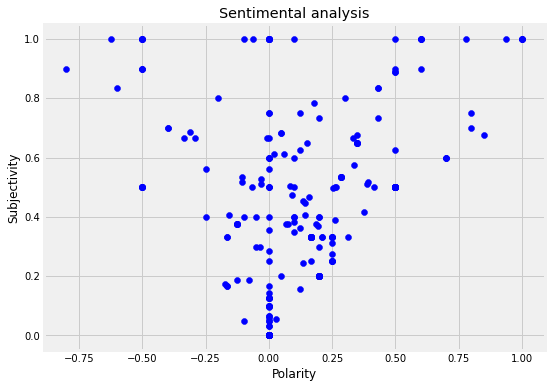

In [9]:
df2 = df.head(1000)
import matplotlib.pyplot as plt
plt.figure(figsize =  (8,6))
for i in range(0,df2.shape[0]):
  plt.scatter(df2['Polarity'][i],df2['Subjectivity'][i],color = "Blue")

plt.title('Sentimental analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [10]:
#Counting the sum of polarities
sum = 0
for i in range(0,df.shape[0]):
    sum += df['Polarity'][i]

  

In [11]:
if(sum > 0):
  print("The ovrall Sentiment in chat is Positive")
elif(sum < 0):
  print("The overall Sentiment in chat is negetive")

The ovrall Sentiment in chat is Positive


In [12]:
#Count to get number of Negetive messages
NegetiveCount = 0
for i in range(0,df.shape[0]):
  val = df['Polarity'][i]
  if(val < 0):
    NegetiveCount += 1

NegetiveCount

808

In [13]:
#Count to get number of Positive messages
PositiveCount = 0
for i in range(0,df.shape[0]):
  val = df['Polarity'][i]
  if(val > 0):
    PositiveCount += 1

PositiveCount

2465

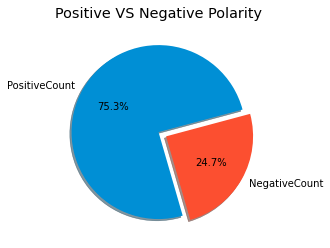

<Figure size 432x288 with 0 Axes>

In [20]:
x = [PositiveCount, NegetiveCount]
labels = ["PositiveCount", "NegativeCount"]
my_colors = ['lightblue','lightsteelblue','silver']
my_explode = (0, 0.1)
plt.pie(x = x, labels = legends, autopct ='%1.1f%%', explode = my_explode, shadow= True, startangle=15)
plt.title("Positive VS Negative Polarity")
plt.show()
plt.savefig('Insights/Pos_VS_Neg_Count.png', format = 'png')